In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import plotting
import importlib
importlib.reload(plotting)

<module 'plotting' from '/home/frankwoods/Desktop/lassie/plotting.py'>

# Load in all depth vs resistance curves into a dataframe list

In [6]:
def load_data(data_src):
    depth_resist_curve_df_list = [] # used for plotting
    filename_list = []
    for filename in os.listdir(data_src):
        df = pd.read_csv(f"{data_src}/{filename}")
        depth_resist_curve_df_list.append(df)
        filename_list.append(filename)
    return depth_resist_curve_df_list, filename_list

data_src = "data/cleaned_data"
depth_resist_curve_df_list, filename_list = load_data(data_src)
filename_to_depth_resist = dict(zip(filename_list, depth_resist_curve_df_list))

In [7]:
data_features_df = pd.read_csv("data/features.csv")
clustering_features_df = plotting.extract_numerical_features(data_features_df)

# K-Means Clustering Implementation w/ k-means++ initialization for centroids

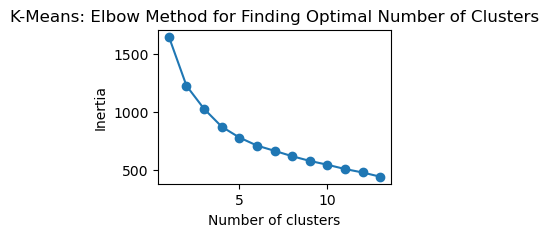

In [8]:
inertias = []
for k in range(1,14):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=100).fit(clustering_features_df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(3,2))
plt.plot(range(1,14), inertias, marker='o')
plt.title("K-Means: Elbow Method for Finding Optimal Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid=True
plt.show()

# K-Means Clustering
- assumes
    - spherical clusters (isotropic)
    - similar size clusters (equal variance)
    - features are on same scale
    - clusters are linearly separable
    - number of clusters (k) is known

In [9]:
kmeans_elbow = 6
kmeans = KMeans(n_clusters=kmeans_elbow, init="k-means++", n_init=100).fit(clustering_features_df)
# print(f"kmeans cluster centers: {kmeans.cluster_centers_}")
plotting.pca_analysis(clustering_features_df) # printing scree plot
# plotting.plot_clusters_together(kmeans.labels_, "kmeans")
plotting.plot_clusters_seperately(kmeans.labels_, clustering_features_df.index.tolist(), depth_resist_curve_df_list, data_features_df, "kmeans")
plotting.plot_pca(clustering_features_df, y_labels=kmeans.labels_, num_pc=3, graph_title="kmeans")

    Eigenvalue  Proportion  Cumulative
PC                                    
1     5.858204    0.386996    0.386996
2     2.957401    0.195368    0.582364
3     1.605271    0.106045    0.688409
4     1.286554    0.084991    0.773400
5     0.871551    0.057575    0.830975
6     0.793326    0.052408    0.883383
7     0.484444    0.032003    0.915385
8     0.347951    0.022986    0.938371
9     0.271373    0.017927    0.956298
10    0.197727    0.013062    0.969360
11    0.168420    0.011126    0.980486
12    0.158485    0.010470    0.990956
13    0.093465    0.006174    0.997130
14    0.030968    0.002046    0.999176
15    0.012476    0.000824    1.000000


                             PC1       PC2       PC3       PC4       PC5  \
max_depth              -0.332765 -0.203269 -0.026953 -0.184117  0.050429   
max_resistance          0.303384  0.128583  0.113806  0.435057  0.311889   
num_peaks              -0.234316 -0.099488  0.384159 -0.385283  0.269519   
largest_force_drop     -0.19913

AttributeError: 'numpy.ndarray' object has no attribute 'index'

# Hierarchical Clustering

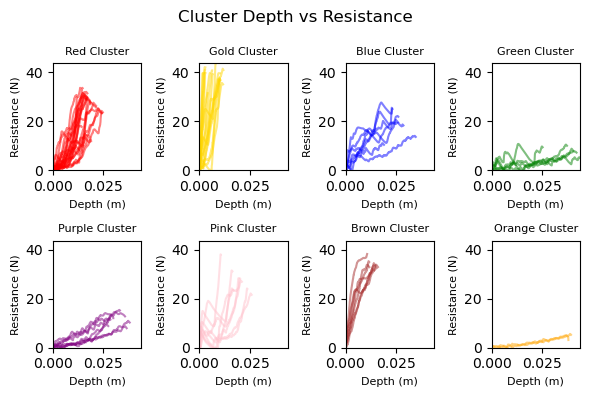

In [ ]:

# if distance_threshold != None then n_clusters = None
hierarchical = AgglomerativeClustering(distance_threshold=None, n_clusters=8)
hierarchical.fit(clustering_features_df)
linkage = "Ward"
plotting.plot_clusters_seperately(hierarchical.labels_, clustering_features_df.index.tolist(), depth_resist_curve_df_list, data_features_df, 'hierarchical')
plotting.plot_pca(clustering_features_df, y_labels=hierarchical.labels_, num_pc=3, graph_title="hierachical")


# DBSCAN

In [ ]:

# eps=0.7, min_samples=3 works very well
# dbscan = DBSCAN(eps=1.8, min_samples=10).fit(clustering_features_df)
# cleaned_db_labels = [label if label != -1 else max(dbscan.labels_)+1 for label in dbscan.labels_]
# # get_curve_idx_from_cluster_color("yellow", cleaned_db_labels)
# plotting.plot_pca(clustering_features_df, cleaned_db_labels, num_pc=3, graph_title='dbscan')
# plotting.plot_clusters_seperately(cleaned_db_labels, clustering_features_df.index.to_list(), depth_resist_curve_df_list)